## MMAT Final Project

### Data Pull

In [1]:
\c 100 120
h:`$":"
tab2df:{r:.p.import[`pandas;`:DataFrame.from_dict;flip 0!x][@;cols x];$[count k:keys x;r[`:set_index]k;r]}
pivot:{[t]
 u:`$string asc distinct last f:flip key t;
 pf:{x#(`$string y)!z};
 p:?[t;();g!g:-1_ k;(pf;`u;last k:key f;last key flip value t)];
 p}

In [2]:
/%python
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
b:1!flip `orderid`bid`bsize!"jff"$\:()
a:1!flip `orderid`ask`asize!"jff"$\:()
depth:flip `time`bid`bsize`ask`asize!"p****"$\:()

In [4]:
upd:{[tn;n;ba;x]
 b:ba 0;a:ba 1;
 B:OB:last'[tn`bid`bsize];A:OA:last'[tn`ask`asize];
 if[not null x`bid;B:value flip 0!select[n;>bid] sum bsize by bid from b:select from b,:x`orderid`bid`bsize where bsize>0];
 if[not null x`ask;A:value flip 0!select[n;<ask] sum asize by ask from a:select from a,:x`orderid`ask`asize where asize>0];
 if[not (OB;OA)~(B;A);tn upsert x[`time],B,A];
 (b;a)}

In [5]:
orders:{[dt;s]
 o:select `g#orderid,time,sym,bid,ask,bsize,asize,tbm from order where date = last dt, sym like s;
 o}

In [6]:
tm:2021.08.01D20
show o:h (orders;"d"$tm;"X:SXBTUSD@FTX")

orderid              time                          sym           bid   ask   bsize   asize  tbm
-----------------------------------------------------------------------------------------------
5180747587778434389  2021.08.01D19:06:22.029600000 X:SXBTUSD@FTX       41050         0.058     
-7840576298825648909 2021.08.01D19:06:22.029600000 X:SXBTUSD@FTX       41051         2.75      
-4819999225201873937 2021.08.01D19:06:22.029600000 X:SXBTUSD@FTX       41052         3.915     
7624302949928766025  2021.08.01D19:06:22.029600000 X:SXBTUSD@FTX       41053         9.5284    
1491212647257830676  2021.08.01D19:06:22.029600000 X:SXBTUSD@FTX       41054         0.0048    
-4583326182974958414 2021.08.01D19:06:22.029600000 X:SXBTUSD@FTX       41055         0.0005    
-6983523344196473095 2021.08.01D19:06:22.029600000 X:SXBTUSD@FTX       41056         0.008     
-3728445030228767048 2021.08.01D19:06:22.029600000 X:SXBTUSD@FTX       41060         0.008     
4160572283641278075  2021.08.01D19:06:22

In [7]:
delete from `depth; (b;a) upd[`depth;10]/o

(+(,`orderid)!,6667632657967072235 -6451851949297222319 8260571258771643639 -423082842626948247 62683312165584339 -51..
(+(,`orderid)!,2399608238323732905 -7293629412714059350 8221728495823401448 2109555807664171085 -8376446895202809055 ..


In [8]:
10#depth

time                          bid bsize ask                                                          asize           ..
---------------------------------------------------------------------------------------------------------------------..
2021.08.01D19:06:22.029600000           ,41050f                                                      ,0.058          ..
2021.08.01D19:06:22.029600000           41050 41051f                                                 0.058 2.75      ..
2021.08.01D19:06:22.029600000           41050 41051 41052f                                           0.058 2.75 3.915..
2021.08.01D19:06:22.029600000           41050 41051 41052 41053f                                     0.058 2.75 3.915..
2021.08.01D19:06:22.029600000           41050 41051 41052 41053 41054f                               0.058 2.75 3.915..
2021.08.01D19:06:22.029600000           41050 41051 41052 41053 41054 41055f                         0.058 2.75 3.915..
2021.08.01D19:06:22.029600000           

In [9]:
show d: select last bid, last bsize, last ask, last asize by time from depth

time                         | bid                                                          bsize                    ..
-----------------------------| --------------------------------------------------------------------------------------..
2021.08.01D19:06:22.029600000| 41041 41035 41032 41024 41023 41012 40875 40874f             5.245 0.0098 1.0378 0.634..
2021.08.01D19:06:22.071000000| 41041 41035 41032 41024 41023 41021 41018 41012 40875f       5.245 0.0435 1.0378 0.634..
2021.08.01D19:06:22.099900000| 41041 41035 41032 41024 41023 41021 41018 41012 40875f       5.245 0.0435 1.0378 0.634..
2021.08.01D19:06:22.117100000| 41041 41035 41032 41024 41023 41021 41018 41012 40969 40875f 5.245 0.0435 1.0378 0.634..
2021.08.01D19:06:22.152500000| 41041 41035 41032 41024 41023 41021 41018 41012 40969 40875f 5.245 0.0435 1.0378 0.634..
2021.08.01D19:06:22.170600000| 41041 41035 41032 41029 41024 41023 41021 41018 41012 40969f 5.245 0.0435 1.0378 0.008..
2021.08.01D19:06:22.209300000| 41041 410

In [10]:
.p.set[`df] tab2df d

In [11]:
/%python
print(df)

                                                                  bid  ...                                              asize
time                                                                   ...                                                   
681159982029600000  [41041.0, 41035.0, 41032.0, 41024.0, 41023.0, ...  ...  [0.058, 2.75, 3.915, 9.5284, 0.0048, 0.0005, 0...
681159982071000000  [41041.0, 41035.0, 41032.0, 41024.0, 41023.0, ...  ...  [0.058, 5.0827, 3.915, 9.0862, 0.0005, 0.008, ...
681159982099900000  [41041.0, 41035.0, 41032.0, 41024.0, 41023.0, ...  ...  [0.543, 0.058, 4.0127, 3.915, 8.5262, 0.0005, ...
681159982117100000  [41041.0, 41035.0, 41032.0, 41024.0, 41023.0, ...  ...  [0.576, 0.098, 0.34, 1.363, 0.058, 4.0127, 3.9...
681159982152500000  [41041.0, 41035.0, 41032.0, 41024.0, 41023.0, ...  ...  [7.7979, 0.098, 0.51, 0.543, 0.058, 2.2, 3.869...
...                                                               ...  ...                                            

In [17]:
/%python
df_copy = df.copy()

In [21]:
/%python

df['time'] = pd.to_datetime(df.index)
df.index = df['time'].apply(lambda x: x.replace(year = x.year + 30))
df.drop(['time'], axis = 1, inplace = True)

print(df)

                                                                          bid  ...                                              asize
time                                                                           ...                                                   
2021-08-02 19:06:22.029600  [41041.0, 41035.0, 41032.0, 41024.0, 41023.0, ...  ...  [0.058, 2.75, 3.915, 9.5284, 0.0048, 0.0005, 0...
2021-08-02 19:06:22.071000  [41041.0, 41035.0, 41032.0, 41024.0, 41023.0, ...  ...  [0.058, 5.0827, 3.915, 9.0862, 0.0005, 0.008, ...
2021-08-02 19:06:22.099900  [41041.0, 41035.0, 41032.0, 41024.0, 41023.0, ...  ...  [0.543, 0.058, 4.0127, 3.915, 8.5262, 0.0005, ...
2021-08-02 19:06:22.117100  [41041.0, 41035.0, 41032.0, 41024.0, 41023.0, ...  ...  [0.576, 0.098, 0.34, 1.363, 0.058, 4.0127, 3.9...
2021-08-02 19:06:22.152500  [41041.0, 41035.0, 41032.0, 41024.0, 41023.0, ...  ...  [7.7979, 0.098, 0.51, 0.543, 0.058, 2.2, 3.869...
...                                                           

In [24]:
/%python 
df_concat = df["bid"].apply(pd.Series)
df_concat.columns = np.array(["bid"+str(i) for i in range(1,11)])

for col in ["ask", "bsize", "asize"] :
    df_curr = df[col].apply(pd.Series)
    df_curr.columns = np.array([col+str(i) for i in range(1,11)])
    df_concat = pd.concat([df_concat, df_curr], axis=1)

print(df_concat)

                               bid1     bid2     bid3  ...  asize8  asize9  asize10
time                                                   ...                         
2021-08-02 19:06:22.029600  41041.0  41035.0  41032.0  ...  0.0080  1.1345   0.1001
2021-08-02 19:06:22.071000  41041.0  41035.0  41032.0  ...  1.1345  0.1001   0.0300
2021-08-02 19:06:22.099900  41041.0  41035.0  41032.0  ...  0.0080  1.1345   0.1001
2021-08-02 19:06:22.117100  41041.0  41035.0  41032.0  ...  8.5262  0.0005   0.0080
2021-08-02 19:06:22.152500  41041.0  41035.0  41032.0  ...  8.5262  0.0005   0.0080
...                             ...      ...      ...  ...     ...     ...      ...
2021-08-02 21:54:59.524300  41078.0  41076.0  41074.0  ...  0.0800  0.0080   0.9744
2021-08-02 21:54:59.548000  41078.0  41076.0  41074.0  ...  0.1902  0.0800   0.0324
2021-08-02 21:54:59.576400  41078.0  41076.0  41074.0  ...  0.1902  0.0800   0.0324
2021-08-02 21:54:59.598600  41078.0  41076.0  41074.0  ...  0.1902  0.0800  

In [30]:
/%python
print(df_concat[df_concat.isna().any(axis=1)])

                               bid1     bid2     bid3  ...  asize8  asize9  asize10
time                                                   ...                         
2021-08-02 19:06:22.029600  41041.0  41035.0  41032.0  ...  0.0080  1.1345   0.1001
2021-08-02 19:06:22.071000  41041.0  41035.0  41032.0  ...  1.1345  0.1001   0.0300
2021-08-02 19:06:22.099900  41041.0  41035.0  41032.0  ...  0.0080  1.1345   0.1001

[3 rows x 40 columns]


In [31]:
/%python
df_concat.dropna(inplace=True)

In [33]:
/%python
df_concat.to_csv("MMAT_Final_Dataset.csv")

In [32]:
/%python
this should be installed locally via terminal -> pip install tensorflow

[0;31me: invalid syntax (, line 1)[0m: [0;31me: invalid syntax (, line 1)[0m

In [32]:
/%python
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, Conv2D, Flatten, MaxPooling1D, MaxPooling2D, Dense, LeakyReLU, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.compat.v1.keras.layers import CuDNNLSTM

[0;31me: No module named 'tensorflow'[0m: [0;31me: No module named 'tensorflow'[0m

In [29]:
/%python 
print(np.where(df_concat.isna()))

(array([0, 0, 0, 0, 1, 1, 2, 2]), array([ 8,  9, 28, 29,  9, 29,  9, 29]))


In [ ]:
************* START *************

In [1]:
/%python
from tqdm import tqdm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('MMAT_Final_Dataset.csv')
df = df.drop(columns=["time"])

def generate_features_labels(df,ask, bid,k=20, alpha = 10e-5):
    df_ = df.copy()
    df_['mid_price'] = (df_[ask].to_numpy()+df_[bid].to_numpy())/2
    df_['target'] = 1
    index = df_.columns.get_loc('mid_price')
    target_index = df_.columns.get_loc('target')
    shape = df_.shape[0]
    y = df_['target'].to_numpy()
    for i in tqdm(range(k,shape-k)):
        if i==k:
            m_b = np.mean(df_.iloc[(i-k):i, index].to_numpy())
            m_a = np.mean(df_.iloc[i+1:(i+k+1), index].to_numpy())
            val = df_.iloc[i-k,index]
            valB = df_.iloc[i+1, index]
        else:
            curr_val = df_.iloc[i-1,index]
            curr_valB = df_.iloc[i+k, index]
            m_b = (m_b*k+(curr_val)-(val))/k
            m_a = (m_a*k+(curr_valB - valB))/k
            val = df_.iloc[(i-k),index]
            valB = df_.iloc[(i+1), index]

        if (m_b > m_a*(1+alpha)):
            y[i] = 2
        if (m_b < m_a*(1-alpha)):
            y[i] = 0

    y = y[k:shape-k]
    X = df.iloc[k:shape-k,:].to_numpy()
    return X,y

full_data = df

min_ = float('inf')
minI = 0
for i in np.logspace(0,-8,10, endpoint = True):
    X,y = generate_features_labels(full_data, ask='bid1', bid = 'ask1', alpha=i)
    y_ = pd.Series(y)
    temp = y_.value_counts()
    a, b, c = 0, 0, 0
    
    if len(temp) == 2 :
        a,b = temp.values[0], temp.values[1]
    elif len(temp) == 1 :
        a =  temp.values[0]
    else :
        a,b,c = temp[0], temp[1], temp[2]
    sum_ = a+b+c
    l2 = ((1/3-(a/sum_))*100)**2 + ((1/3-(b/sum_))*100)**2 + ((1/3-(c/sum_))*100)**2
    if l2 < min_:
        min_ = l2
        minI = i
    del X,y,temp

print(minI, min_)
X,y = generate_features_labels(full_data, ask='bid1', bid = 'ask1', alpha=minI)


100%|██████████| 159068/159068 [00:15<00:00, 10475.14it/s]


4.641588833612782e-06 18.529213451837364


100%|██████████| 159068/159068 [00:14<00:00, 10933.45it/s]


In [2]:
/%python
y = y.astype('int')
sns.countplot(x = y)

In [3]:
/%python
N = 10
full_data['mid_price'] = (full_data['bid1'] + full_data['ask1'])/2
for i in range(1,N+1):
  full_data['bid'+str(i)] = full_data['bid'+str(i)] - full_data['mid_price'] 
  full_data['ask'+str(i)] = full_data['ask'+str(i)] - full_data['mid_price']

full_data = full_data.drop(columns="mid_price")
print(full_data)

        bid1  bid2  bid3  bid4  bid5  ...  asize6  asize7  asize8  asize9  asize10
0       -0.5  -6.5  -9.5 -17.5 -18.5  ...  4.0127  3.9150  8.5262  0.0005   0.0080
1       -0.5  -6.5  -9.5 -17.5 -18.5  ...  2.2000  3.8691  8.5262  0.0005   0.0080
2       -0.5  -6.5  -9.5 -12.5 -17.5  ...  1.4665  4.0160  0.0005  0.0080   0.0080
3       -0.5  -6.5  -9.5 -12.5 -15.5  ...  1.2921  0.0313  0.0005  0.0080   0.0080
4       -0.5  -6.5  -9.5 -12.5 -15.5  ...  1.2921  0.0313  0.0005  0.0080   1.0900
...      ...   ...   ...   ...   ...  ...     ...     ...     ...     ...      ...
159103  -0.5  -2.5  -4.5  -6.5  -7.5  ...  0.9054  0.1902  0.0800  0.0080   0.9744
159104  -0.5  -2.5  -4.5  -6.5  -7.5  ...  0.0493  0.9054  0.1902  0.0800   0.0324
159105  -0.5  -2.5  -4.5  -6.5  -7.5  ...  0.0493  8.1434  0.1902  0.0800   0.0324
159106  -0.5  -2.5  -4.5  -6.5  -7.5  ...  0.0493  8.1434  0.1902  0.0800   0.0324
159107  -0.5  -2.5  -4.5  -6.5  -7.5  ...  0.0493  8.1434  0.1902  0.0800   0.0324

[15

In [8]:
/%python
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, Conv2D, Flatten, MaxPooling1D, MaxPooling2D, Dense, LeakyReLU, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.compat.v1.keras.layers import LSTM

T = 30 #100
D = 40
N = len(X) - T
trainPart = 100000

X_train = np.zeros((trainPart, T, D), dtype = 'float16')
y_train = np.zeros(trainPart, dtype = 'float16')

#Preparing the time series data using timestep of 100 and no of features = 200
for t in range(trainPart):
    X_train[t, :, :] = X[t:t+T]
    y_train[t] = y[t+T]

X_test = np.zeros((N - trainPart, T, D), dtype='float16')
y_test = np.zeros(N - trainPart, dtype='float16')
#Preparing the time series data using timestep of 100 and no of features = 40
for k in range(N - trainPart):
    t = k + trainPart
    X_test[k, :, :] = X[t:t+T]
    y_test[k] = y[t+T]

X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)


i = Input(shape=X_train[0].shape)
x = Conv2D(16, (4,D), activation=LeakyReLU(alpha=0.01))(i)
x = tf.keras.layers.Reshape(target_shape=(T-3,16))(x)
x = Conv1D(16, 4, activation=LeakyReLU(alpha=0.01))(x)
x = tf.keras.layers.BatchNormalization()(x)
x = MaxPooling1D(2)(x)
x = Conv1D(32, 3, activation=LeakyReLU(alpha=0.01))(x)
x = tf.keras.layers.BatchNormalization()(x)
x = MaxPooling1D(2)(x)
x = Bidirectional(LSTM(64, return_sequences = False))(x)
x = Dense(32, activation=LeakyReLU(alpha=0.01))(x)
x = Dense(32, activation=LeakyReLU(alpha=0.01))(x)
x = Dense(3, activation='softmax')(x)

model = Model(i,x)


In [9]:
/%python
print(model.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 30, 40, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 27, 1, 16)         2576      
                                                                 
 reshape_2 (Reshape)         (None, 27, 16)            0         
                                                                 
 conv1d_4 (Conv1D)           (None, 24, 16)            1040      
                                                                 
 batch_normalization_4 (Batc  (None, 24, 16)           64        
 hNormalization)                                                 
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 12, 16)           0         
 1D)                                                       

In [10]:
/%python
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [11]:
/%python
EPOCHS = 6
BATCH_SIZE = 32
a = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_test, y_test))

Epoch 1/6
3125/3125 [==============================] - ETA: 0s - loss: 0.7873 - accuracy: 0.63611   - ETA: 28s - loss: 1.0770 - accuracy: 0.422 - ETA: 27s - loss: 1.0686 - accuracy: 0.427 - ETA: 27s - loss: 1.0646 - accuracy: 0.424 - ETA: 27s - loss: 1.0590 - accuracy: 0.429 - ETA: 27s - loss: 1.0536 - accuracy: 0.436 - ETA: 27s - loss: 1.0459 - accuracy: 0.444 - ETA: 26s - loss: 1.0384 - accuracy: 0.453 - ETA: 26s - loss: 1.0361 - accuracy: 0.455 - ETA: 26s - loss: 1.0323 - accuracy: 0.458 - ETA: 26s - loss: 1.0255 - accuracy: 0.463 - ETA: 26s - loss: 1.0189 - accuracy: 0.468 - ETA: 26s - loss: 1.0167 - accuracy: 0.472 - ETA: 26s - loss: 1.0133 - accuracy: 0.474 - ETA: 27s - loss: 1.0091 - accuracy: 0.478 - ETA: 27s - loss: 1.0073 - accuracy: 0.482 - ETA: 27s - loss: 1.0020 - accuracy: 0.4 - ETA: 27s - loss: 0.9989 - accuracy: 0.48 - ETA: 27s - loss: 0.9916 - accuracy: 0.487 - ETA: 27s - loss: 0.9868 - accuracy: 0.49 - ETA: 27s - loss: 0.9831 - accuracy: 0.496 - ETA: 27s - loss: 0.979

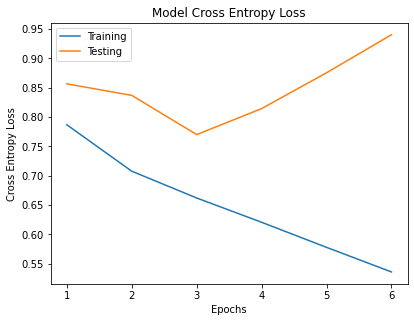

In [24]:
/%python
sns.lineplot(x=range(1,EPOCHS+1),y=a.history['loss'])
sns.lineplot(x=range(1,EPOCHS+1),y=a.history['val_loss'])
plt.title('Model Cross Entropy Loss')
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Epochs')
plt.legend(['Training', 'Testing'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict(X_test).argmax(axis=1)

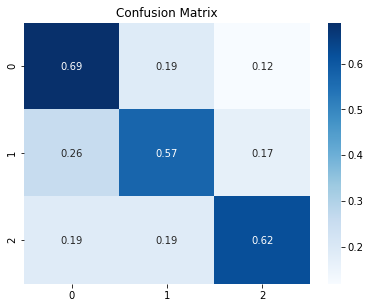

'2021.12.20T08:51:42.062 couldn't report -- exiting


In [34]:
/%python
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.title('Confusion Matrix')
ax=sns.heatmap(cm, annot=True, xticklabels=[0,1,2], yticklabels=[0,1,2], cmap='Blues')
ax.set_ylim(3.0, 0)
plt.show()